<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week04-workshop-1/Week4_deploy_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   area  rooms   price
0  2104      3  399900
1  1600      3  329900
2  2400      3  369000
3  1416      2  232000
4  3000      4  539900
   area  rooms
0  2104      3
1  1600      3
2  2400      3
3  1416      2
4  3000      4
    price
0  399900
1  329900
2  369000
3  232000
4  539900
Train
[89597.9095428]
[[  139.21067402 -8738.01911233]]
Predict
[[315591.14290408]
 [481015.87425869]]
Deploy


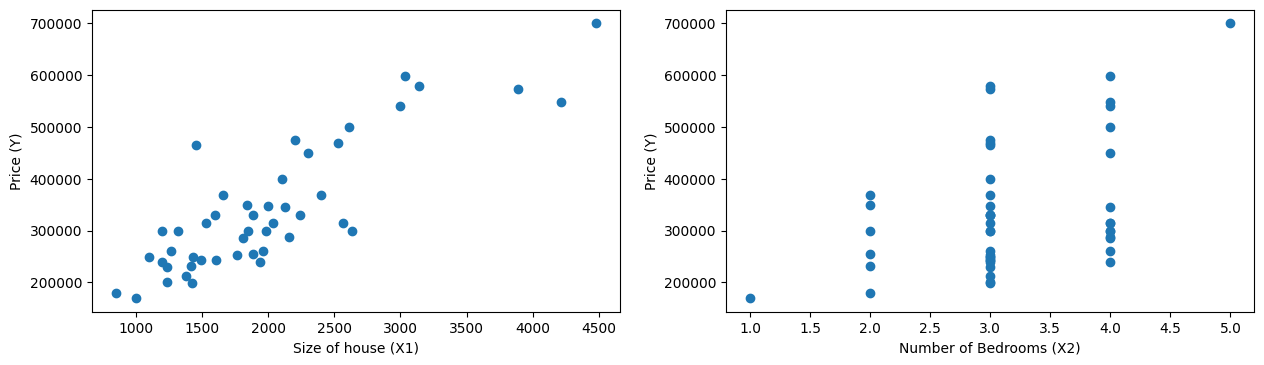

In [60]:
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt')
print(data.head())
#X = data[["area","rooms"]]
X = data.iloc[:,0:2]
print(X.head())

#y = data.price
#y = data.iloc[:,2]
y = data[["price"]] 
print(y.head())

plt.figure(figsize = (15,4), dpi=100)
plt.subplot(121)
plt.scatter(X.iloc[:,0],y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X.iloc[:,1],y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")

"""Train model"""
print("Train")
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

"""Predict"""
print("Predict")
#X_test = np.array([[2000,6]])
X_test = pd.DataFrame(
    {
    "area":[2000,3000],
    "rooms":[6,3]
    }
)
result = lin_reg.predict(X_test)
print(result)

"""Deploy"""
print("Deploy")
pickle.dump(lin_reg, open('model.sav','wb') )
# from google.colab import files
# files.download('model.sav')

In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
import timeit

SGD Training score 0.7329151465451116
SGD Predict [318252.53218948 479927.02344924]


/Users/itthisak/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Price (Y)')

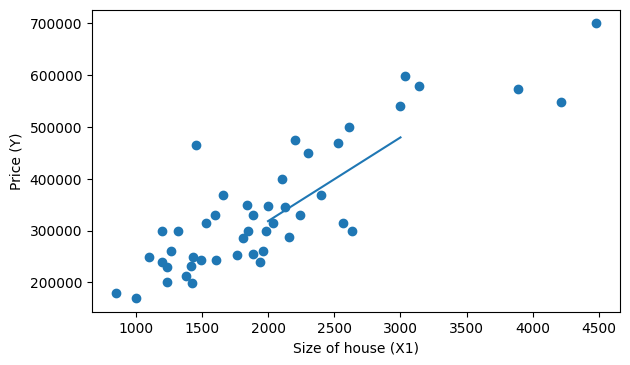

In [63]:
reg = make_pipeline(StandardScaler(),
    SGDRegressor(max_iter=1000, tol=1e-3,))
reg.fit(X,y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(epsilon=0.01,loss='epsilon_insensitive'))])
print("SGD Training score",reg.score(X,y))
y_predict = reg.predict(X_test)
print("SGD Predict",y_predict)
plt.figure(figsize = (15,4), dpi=100)
plt.subplot(121)
plt.scatter(X.iloc[:,0],y)
plt.plot(X_test.loc[:,"area"],y_predict)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
# plt.subplot(122)
# plt.scatter(X.iloc[:,1],y)
# plt.plot(X_test.loc[:,"rooms"],y_predict)
# plt.xlabel("Number of Bedrooms (X2)")
# plt.ylabel("Price (Y)")

In [72]:
my_setup = """
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 1000, 10000
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)"""

linear = '''
def test():
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    print('lin_reg.intercept_',lin_reg.intercept_)
    print('lin_reg.coef_',lin_reg.coef_)
'''

sto = '''
def test():
    reg = make_pipeline(StandardScaler(),
    SGDRegressor(max_iter=1000, tol=1e-3))
    reg.fit(X,y)
    Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(epsilon = 0.01))])
    print("SGD Training score",reg.score(X,y))
'''
print("Time(Linear):",timeit.timeit(setup=my_setup,stmt=linear,number=1000))
print("Time(SGD):",timeit.timeit(setup=my_setup,stmt=sto,number=1000))

Time(Linear): 5.7833007303997874e-05
Time(SGD): 6.758300878573209e-05
